In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import path # librairie tierce, `pip install path.py`

%matplotlib inline

## Avec path (librairie tierce, renvoie des path.Path)

In [ ]:
data_folder = path.Path("../../data/pac_power/")
files = data_folder.glob("*.csv")
print(type(files))
for file in files:
    print(file, type(file))

In [ ]:
sorted(files)

il est possible d'ordonner une liste. Mais ce sera l'ordre naturel des objets dans la liste qui différera si ce sont des str, des int....

De plus, il est parfois impossible d'ordonner des objets hétérogènes.

In [ ]:
"7" > 9

In [ ]:
sorted([9, "7"])

Mais `sorted` prend un argument `key` supplémentaire : une fonction permettant de convertir les objets de façon à les comparer entre eux.

In [ ]:
sorted([9, "7"], key=float)

Il est possible d'utiliser cet argument pour ordonner nos fichiers !

In [ ]:
def extract_number_from_file(file):
    return int(file.basename().stripext())

In [ ]:
print(file)
extract_number_from_file(file)

In [ ]:
files = path.Path("../../data/pac_power/").files("*.csv")
for file in sorted(files,
                   key=extract_number_from_file):
    print(file, type(file))

### Analyser ces différents fichiers

In [ ]:
files = path.Path("../../data/pac_power/").files("*.csv")

On va utiliser un dictionnaire pour stocker les différentes données : ce dictionnaire contiendra en clé *le numéro du mois* et en valeur *le tableau numpy contenant les données*.

In [ ]:
import calendar

In [ ]:
data_dict = {}
for file in sorted(files, key=extract_number_from_file):
    month_number = extract_number_from_file(file)
    month_name = calendar.month_name[month_number]
    print(month_name)
    data_dict[month_number] = np.loadtxt(file, delimiter=",")

In [ ]:
data_dict[1].shape

On peut visualiser l'ensemble des puissance, heure par heure pour chaques jours de chaques mois.

In [ ]:
print([d.max() for d in data_dict.values()])
print(max([d.max() for d in data_dict.values()]))

In [ ]:
fig, axs = plt.subplots(2, 6, sharex="all", sharey="all",
                        figsize=(12, 5), constrained_layout=True)
power_max = max([d.max() for d in data_dict.values()])

print(axs)
for i, ax in enumerate(axs.flatten(), 1):
    pcm = ax.pcolormesh(data_dict[i], vmin=0, vmax=power_max)
    ax.set_title(calendar.month_name[i])
    ax.set_ylim(31, 1)
[ax.set_ylabel("day") for ax in axs[:, 0]]
[ax.set_xlabel("hour") for ax in axs[1, :]]

fig.colorbar(pcm, ax=axs.flatten().tolist(),
             shrink=0.95, label="PAC Power (W)");

Il est également possible de calculer un certain nombre de métriques pour chaques mois :

In [ ]:
for month_number, data in sorted(data_dict.items()):
    month_name = calendar.month_name[month_number]
    
    mean_power = data.mean()
    max_power = data.max()
    std_power = data.std()
    day_max, hour_max = np.unravel_index(np.argmax(data), data.shape)
    frac_func = data[np.where(data != 0)].size / data.size
    
    print(f"""{month_name}
    mean: {mean_power:g} W
    max: {max_power:g} W {f'({day_max + 1:02d}/{month_number:02d} {hour_max}H)' if max_power != 0 else ''}
    std: {std_power:g}
    % func: {frac_func*100:g}
    """)

## Exercice: affichage de l'energie journalière

L'objectif de l'exercice est d'obtenir une énergie dépensé chaques jour par la PAC, en kWH puis en MJ.

Indices : il est possible de *concatener* les array numpy avec `np.concatenate(une_liste_d'array)`. La somme se fait avec `np.sum(array)` et accepte un argument `axis` pour ne sommer d'une dimension.

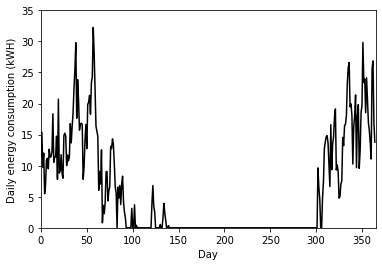

In [ ]:
list_of_arrays = list(data_dict.values())
annual_pac_power = np.concatenate(list_of_arrays, axis=0)
print(annual_pac_power.shape) # On vérifie que les dimensions sont cohérentes
daily_energy = (annual_pac_power / 1000).sum(axis=1) # W -> kW, puis somme sur la dimension des heures.
print(daily_energy.shape) # On vérifie que le résultat ai une dimension avec 365 valeurs.

In [ ]:
fig, ax = plt.subplots() # on crée la figure et l'axe (qui contiendra les courbes)
ax.plot(daily_energy, color="black")  # on affiche l'énergie journalière
# Ajout des labels
ax.set_xlabel("Day of year")
ax.set_ylabel("Daily energy consumption (kWh)")
# Gestion des échelles
ax.set_xlim(0, 365)
ax.set_ylim(0)